### Objective:
**Analyze a dataset of student's academic data to predict final exam scores (G3) and identify key factors influencing performance.**

### Data Loading


In [4]:
import pandas as pd
# loading student performance (Math) dataset
df = pd.read_csv('student-mat.csv' , sep=';' , quotechar='"')

# first 5 rows
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### About Dataset

In [7]:
# check shape and column types
df.info()

# Number of rows and columns
print("Shape:" , df.shape)

# summary statics for numeric columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


The average final grade (G3) is around 10 out of 20.

Some students scored very low (even 0), while the highest score is 20.

Students usually get slightly lower marks in G3 compared to G1 and G2.

Most students study for a moderate amount of time.

Few students have failed in the past, but those who did may score lower.

Many students live close to the school, so travel time is usually short.

Most students have a good relationship with their family.

Students have moderate free time and go out sometimes.

They usually don’t drink alcohol on weekdays, but drink more on weekends.

Most students have average or good health.

Absences are low for most students, but some students have very high absences.

Students with more absences or past failures may perform worse in the final exam

### Data Preprocessing

In [8]:
# checking for missing values
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

**dataset has no missing values.**

In [9]:
### ENcoding categorical variables
from sklearn.preprocessing import LabelEncoder

#encode for object columns
le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

### Exploratory Data Analysis


Text(0.5, 1.0, 'Coreralion with Final Grade (G3)')

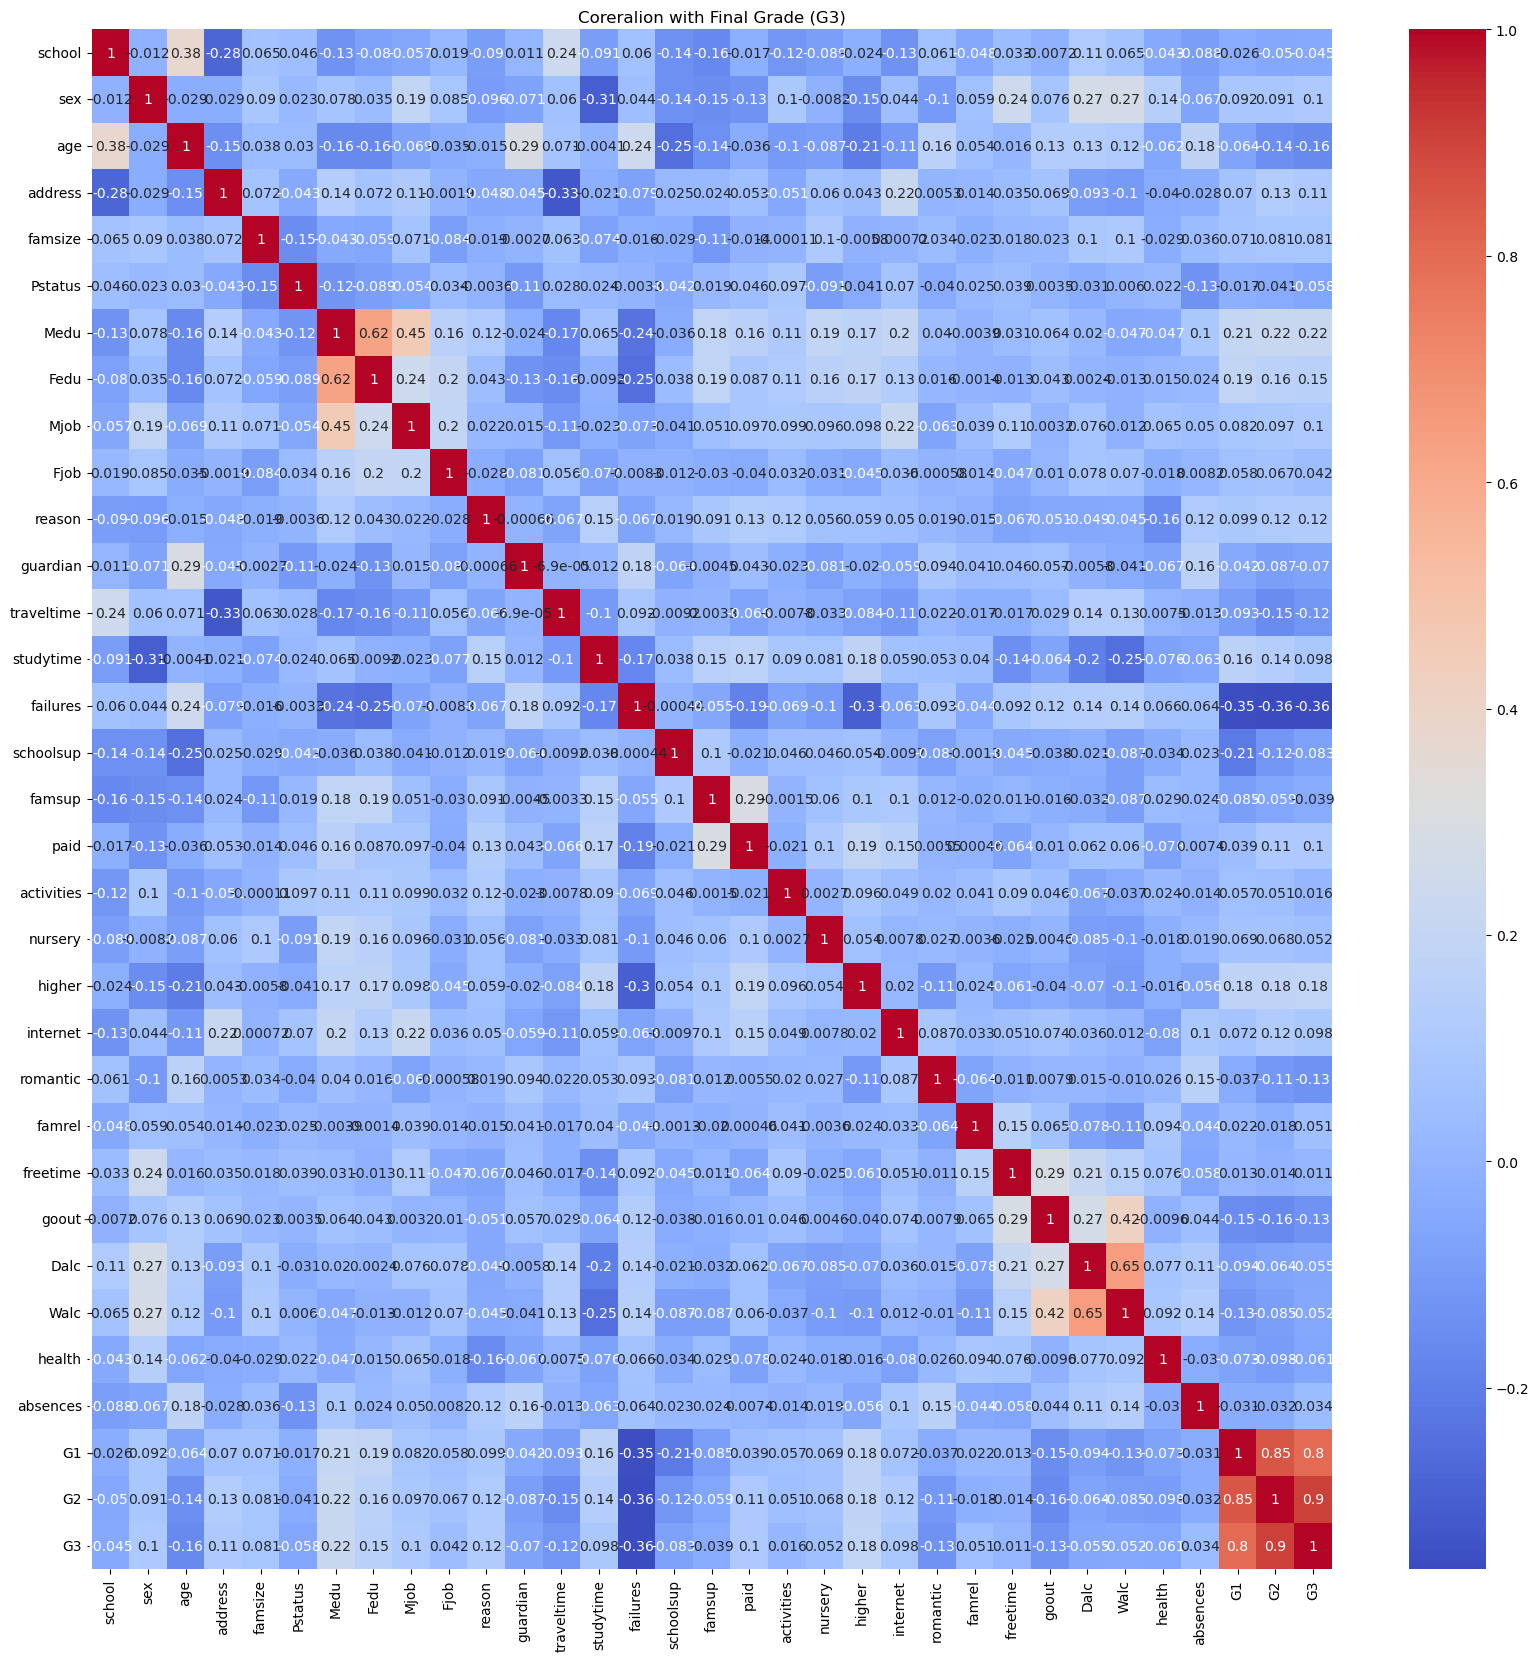

In [15]:
## Corelation Analysis
import seaborn as sns
import matplotlib.pyplot as plt

#corelation heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.corr() , annot=True , cmap='coolwarm')
plt.title('Coreralion with Final Grade (G3)')

Students who scored well in G1 and G2 usually get good final marks too.

Students with past failures often get low final marks.

Students who study more tend to get better grades.

Students who miss more classes (absences) usually get lower grades.

Students who go out a lot may get slightly lower marks.

Drinking alcohol on weekdays or weekends may lead to slightly lower scores.

Whether a student is healthy or not doesn't really affect the marks.

Things like gender, internet access, or support from family don't show a strong link with marks.

Text(0.5, 1.0, 'StudyTime vs Final Grade')

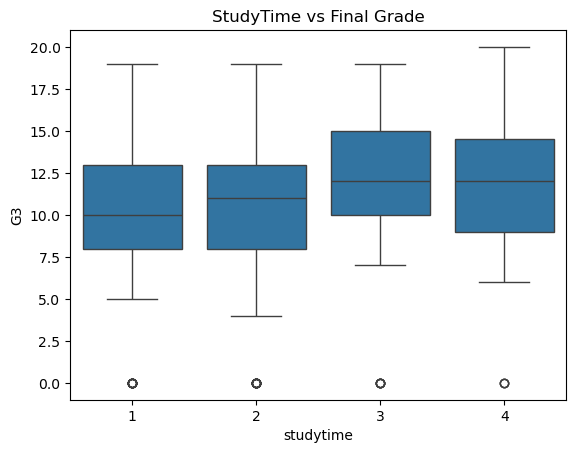

In [18]:
## feature relationships

#studytime vs G3
sns.boxplot(x='studytime' , y='G3' , data=df)
plt.title('StudyTime vs Final Grade')




Students who study more hours  to score better in the final exam.

Study time group 3 and 4 (higher hours) show higher median marks.

Those who study less (group 1) usually get lower grades.

So, more study = better performance.



Text(0.5, 1.0, 'Failure vs Final Grade')

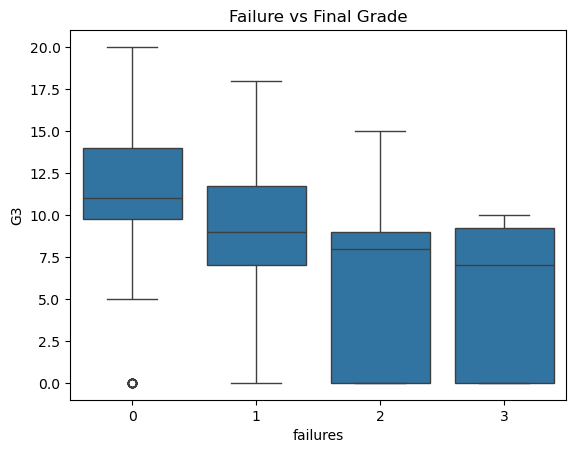

In [19]:
#Failure vs G3
sns.boxplot(x='failures' , y='G3' , data=df)
plt.title('Failure vs Final Grade')




Students with no past failures (0) have the highest marks.

As the number of past failures increases (1 to 3), the marks go down.

Students with 2 or 3 failures often score very low or even zero in G3.

So, more past failures = poor performance.

Text(0.5, 1.0, 'Distribution of Final Grade G3')

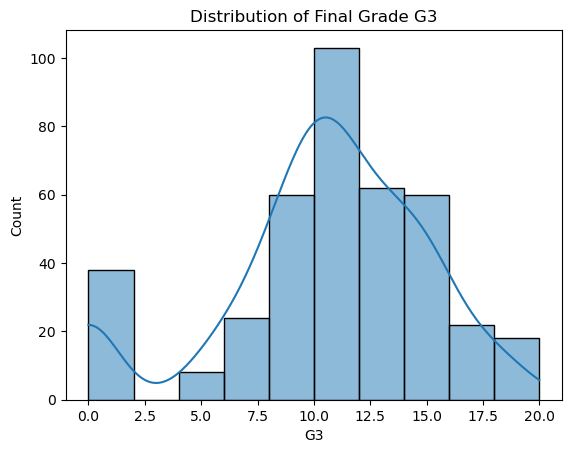

In [20]:
# Histogram of final grade
sns.histplot(df['G3'] , bins=10 , kde=True)
plt.title('Distribution of Final Grade G3')

Most students scored between 10 and 15.

Very few students scored above 18 or below 5.

The curve is slightly right-skewed, meaning more average performers.

A small number of students completely failed (G3 = 0).



### Feature Selection and Splitting


In [21]:
#Features (X) and Target(y)
# keeping all features  except G3
X = df.drop('G3' , axis=1)
y = df['G3']

In [22]:
# Train test split
from sklearn.model_selection import train_test_split

# splitting dataset into 80% training and 20% testing
X_train , X_test , y_train , y_test = train_test_split(X,y ,test_size=0.2 , random_state=45)

In [23]:
print('X train shape: ' , X_train.shape)
print('X test shape: ' , X_test.shape)

print(f'y train shape: {y_train.shape}')
print(f'y test shape: {y_train.shape}')

X train shape:  (316, 32)
X test shape:  (79, 32)
y train shape: (316,)
y test shape: (316,)


### MODEL BUILDING

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


#Initialize the models
Lr = LinearRegression()
Dt = DecisionTreeRegressor(random_state=43)
Rf = RandomForestRegressor(random_state = 43)

# fitting models
Lr.fit(X_train , y_train)
Dt.fit(X_train , y_train)
Rf.fit(X_train , y_train)



RandomForestRegressor(random_state=43)

### Model evaluation


In [29]:
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error
import numpy as np

def evaluate_model(model,name):
    preds = model.predict(X_test)
    print(f"\n{name}")
    print("R^2 Score:" , round(r2_score(y_test,preds),2))
    print("MAE:" , round(mean_absolute_error(y_test , preds),2))
    print("RMSE:",round(np.sqrt(mean_squared_error(y_test , preds)),2))


evaluate_model(Lr,"Linear Regression")
evaluate_model(Dt , "DecisionTree Regressor")
evaluate_model(Rf , "RandomForest Regressor")


Linear Regression
R^2 Score: 0.79
MAE: 1.42
RMSE: 2.14

DecisionTree Regressor
R^2 Score: 0.91
MAE: 0.97
RMSE: 1.45

RandomForest Regressor
R^2 Score: 0.91
MAE: 0.92
RMSE: 1.44


In [32]:
##Grid SearchCV with Randomforest
from sklearn.model_selection import GridSearchCV

# parameters to search
param_grid = {
    'n_estimators' : [50,100,42],
    'max_depth' : [None,5,10],
    'min_samples_split':[2,5,10]
}


grid_search = GridSearchCV(estimator=Rf , param_grid=param_grid,cv=5 , scoring = 'r2' , n_jobs=-1)

grid_search.fit(X_train , y_train)

print("Best Parameters:" ,grid_search.best_params_)
print("Best R^2 score:" , grid_search.best_score_)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

Best Parameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}
Best R^2 score: 0.8539381760987851


### Feayure importance



Text(0.5, 1.0, 'Random Forest Feature importance')

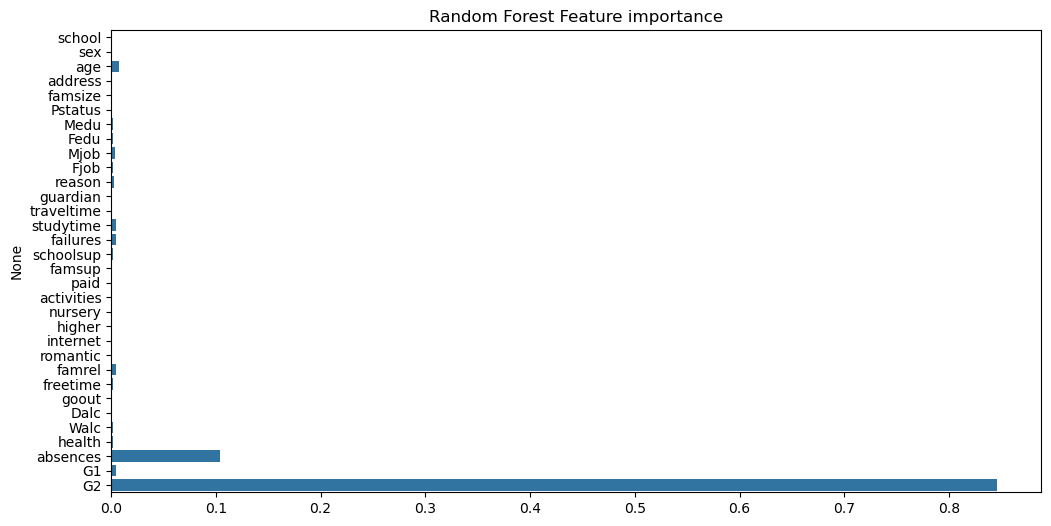

In [33]:
# random forest feature importance
importances = best_rf.feature_importances_
features = X.columns

#plot feature importances
plt.figure(figsize=(12,6))
sns.barplot(x=importances , y=features)
plt.title("Random Forest Feature importance")

G2 and G1 marks are the most helpful in predicting the final grade.

Other things like absences, health, and study time matter a little.

Most other features don’t affect the final grade much.

In [34]:
import joblib

# saving vest estomator
joblib.dump(best_rf , 'best_rf_model.pkl')

['best_rf_model.pkl']